# Problem Ststement

The following project is about Guvi Courses. The dataset for this project contains information
about Guvi courses in various categories, including course title, URL, price, number of
subscribers, number of reviews, number of lectures, course level, rating, content duration,
published timestamp, and subject. With this dataset, we can track the performance of courses
and uncover opportunities to generate revenue.


The Data is organised as follows:
course_id              The title of the Guvi course. (String)
course_title           The URL of the Guvi course. (String)
url                    The price of the Guvi course. (Float)
price                  The number of subscribers for the Guvi course. (Integer)
num_subscribers        The number of reviews for the Guvi course. (Integer)
num_reviews            The number of lectures in the Guvi course. (Integer)
num_lectures           The level of the Guvi course. (String)
level                  The rating of the Guvi course. (Float)
Rating                 The rating of the Guvi course. (Float)
content_duration       The content duration of the Guvi course. (Float)
published_timestamp    The timestamp of when the Guvi course was published. (Datetime)
subject                The subject of the Guvi course. (String)

The Given Data will be preprocessed and used for model creation. In the given data the target variable is Rating. Need to create a model to predict the rating of the courses with the given features

Required Python Libraries

In [9]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')


Readind And Pre Processing the Dataset


In [10]:
df = pd.read_csv(r"D:\datascience\guvi_ratings\3.1-data-sheet-guvi-courses (1).csv")
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [19]:
df.isnull().sum()

course_id              4
course_title           4
url                    4
price                  4
num_subscribers        4
num_reviews            4
num_lectures           4
level                  4
Rating                 4
content_duration       4
published_timestamp    4
subject                3
published_year         4
dtype: int64

In [14]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

df['published_year'] = df['published_timestamp'].dt.year

Dealing null values and shrinking dataset for model

In [20]:
df.nunique()

course_id              3672
course_title           3663
url                    3672
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
Rating                  101
content_duration        105
published_timestamp    3672
subject                   4
published_year            7
dtype: int64

In [16]:
df.describe().T #(numerical) price, num_subscribers, num_reviews, num_lectures, rating, content_duration, (catagorical) level, subject, (time) published_timestamp 


,count,mean,std,min,25%,50%,75%,max
course_id,3676.0,675753.495103,343130.440299,8324.0,407474.00,687692.00,960814.00,1282064.0
price,3676.0,66.115343,61.056073,0.0,20.00,45.00,95.00,200.0
num_subscribers,3676.0,3199.260881,9486.582966,0.0,112.00,912.50,2558.00,268923.0
num_reviews,3676.0,156.309848,935.674518,0.0,4.00,18.00,67.00,27445.0
num_lectures,3676.0,40.129761,50.398507,0.0,15.00,25.00,46.00,779.0
Rating,3676.0,0.610868,0.334287,0.0,0.28,0.76,0.93,1.0
content_duration,3676.0,4.096137,6.054948,0.0,1.00,2.00,4.50,78.5
published_year,3676.0,2015.430903,1.184876,2011.0,2015.00,2016.00,2016.00,2017.0


In [17]:
df1 = df.drop(columns= ['course_id', 'course_title', 'url', 'published_timestamp'])
df1

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,published_year
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,2013.0
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,2013.0
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,2015.0
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,2014.0
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,2016.0
...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2017.0
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,2017.0
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2017.0
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,2017.0


In [18]:
df1.published_year.mode()

0    2016.0
Name: published_year, dtype: float64

In [21]:
df1['price'].fillna(df1['price'].mean(), inplace= True)
df1['Rating'].fillna(df1['Rating'].mean(), inplace= True)
df1['num_subscribers'].fillna(df1['num_subscribers'].median(), inplace= True)
df1['num_reviews'].fillna(df1['num_reviews'].median(), inplace= True)
df1['num_lectures'].fillna(df1['num_lectures'].median(), inplace= True)
df1['level'].fillna(df1['level'].mode(), inplace= True)
df1['content_duration'].fillna(df1['content_duration'].median(), inplace= True)
df1['subject'].fillna(df1['subject'].mode(), inplace= True)
df1['published_year'].fillna(df1['published_year'].median(), inplace= True)

In [22]:
df1['level'].value_counts()

level
All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: count, dtype: int64

In [23]:
df1.Rating.value_counts()

Rating
0.960000    301
0.940000    194
0.110000    150
0.880000    142
0.760000    138
           ... 
0.040000      8
0.650000      8
0.030000      7
0.090000      5
0.610868      4
Name: count, Length: 102, dtype: int64

Encodeing the columns Level and Subject to use it as a feature in the model

In [24]:
df1['level_enc'] = OrdinalEncoder().fit_transform(df1[['level']])
df1['subject_enc'] = OrdinalEncoder().fit_transform(df1[['subject']])

In [25]:
df1

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,published_year,level_enc,subject_enc
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,Subject: Web Development,2013.0,1.0,3.0
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,Subject: Web Development,2013.0,2.0,3.0
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,Subject: Web Development,2015.0,1.0,3.0
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,Subject: Web Development,2014.0,0.0,3.0
4,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,Subject: Web Development,2016.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3675,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,Musical Instruments,2017.0,0.0,2.0
3676,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,Musical Instruments,2017.0,1.0,2.0
3677,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,Musical Instruments,2017.0,0.0,2.0
3678,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,Musical Instruments,2017.0,1.0,2.0


In [26]:
convert = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'published_year', 'level_enc', 'subject_enc'] 
# convert = ['price', 'published_year', 'level_enc', 'subject_enc']

df1[convert] = df1[convert].apply(pd.to_numeric, errors='coerce')
df1 = df1.fillna(0)

df1[convert] = df1[convert].astype(np.int64)


In [27]:
df1.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             3680 non-null   int64  
 1   num_subscribers   3680 non-null   int64  
 2   num_reviews       3680 non-null   int64  
 3   num_lectures      3680 non-null   int64  
 4   level             3680 non-null   object 
 5   Rating            3680 non-null   float64
 6   content_duration  3680 non-null   float64
 7   subject           3680 non-null   object 
 8   published_year    3680 non-null   int64  
 9   level_enc         3680 non-null   int64  
 10  subject_enc       3680 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 316.4+ KB


In [28]:
def plot(df, columns):
    for i in columns:
        plt.figure(figsize=(20,5))
        
        plt.subplot(1,3,1)
        sns.boxplot(df[i])
        plt.title(f'Box Plot for {i}')

        plt.subplot(1,3,2)
        sns.histplot(df[i], kde=True, bins=50)
        plt.title(f'Distribution Plot for {i}')

        plt.subplot(1,3,3)
        sns.violinplot(df[i])
        plt.title(f'Violin Plot for {i}')
        
        plt.show()

In [29]:
df1.columns

Index(['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'Rating', 'content_duration', 'subject', 'published_year', 'level_enc',
       'subject_enc'],
      dtype='object')

Checking for Outliers and skewness using boxplot and Violin and histplots

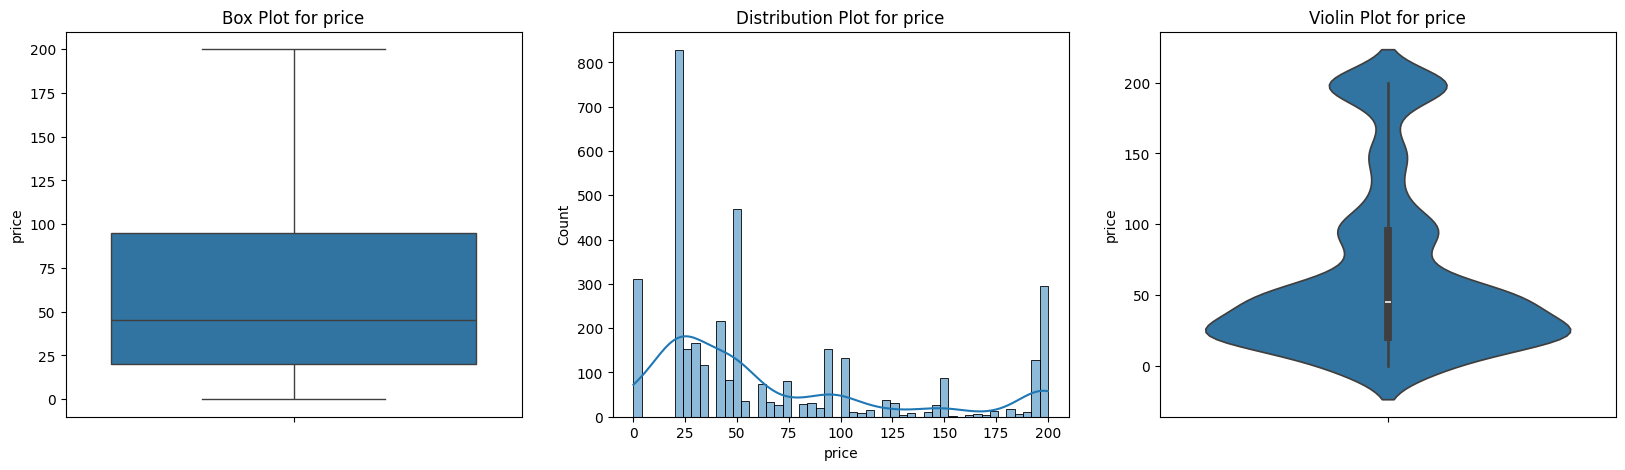

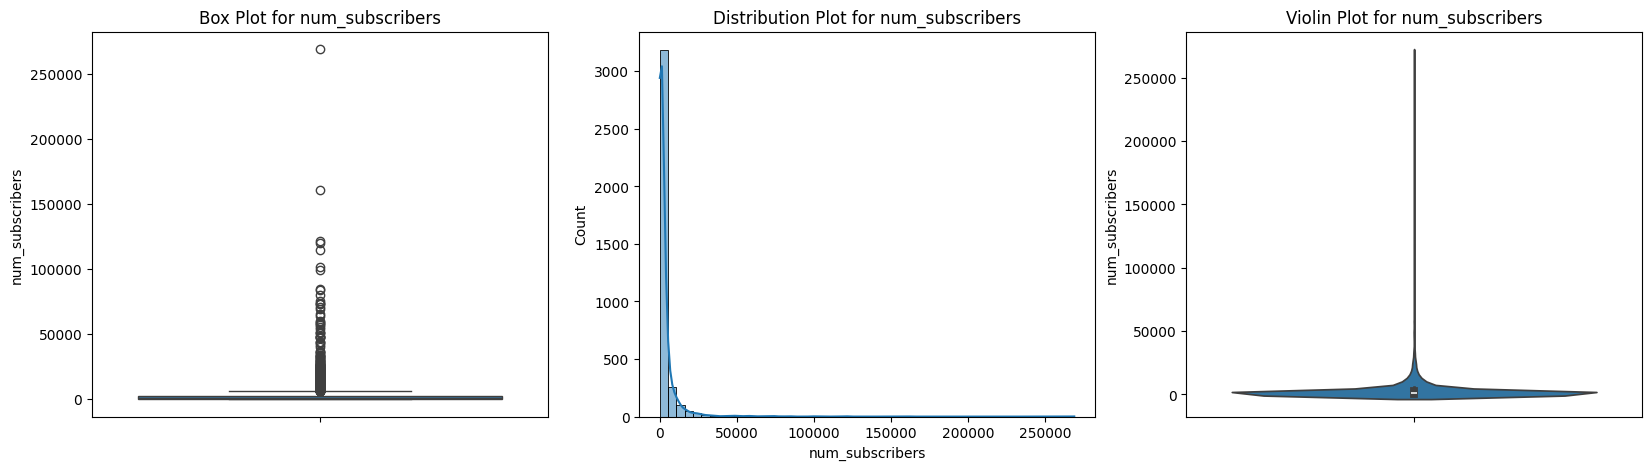

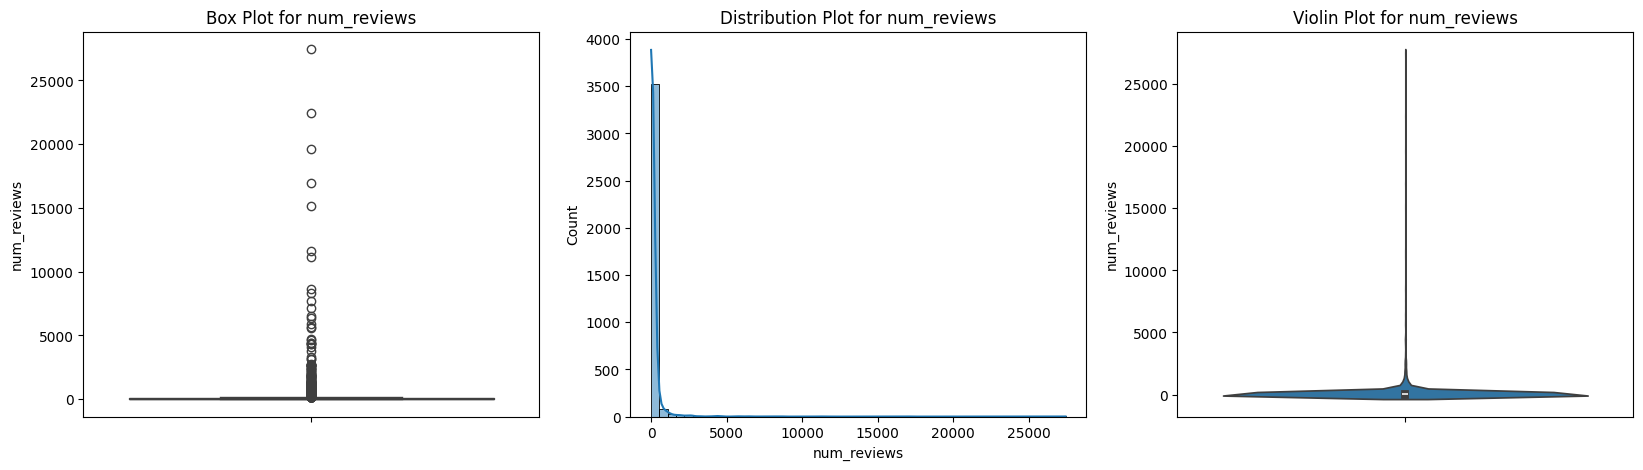

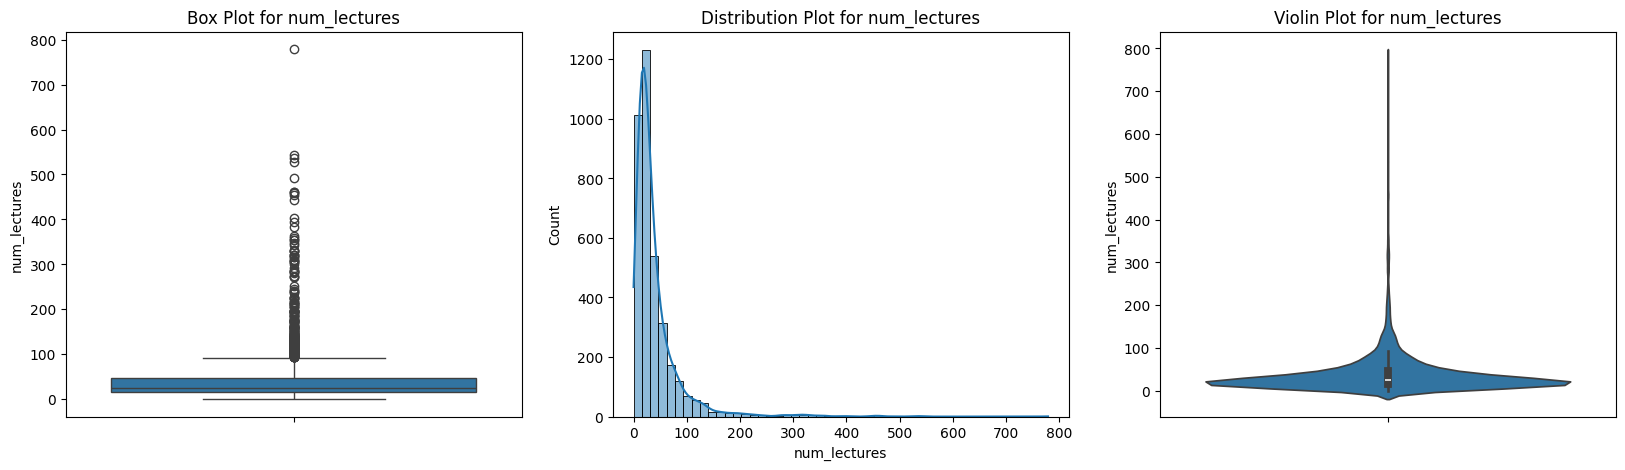

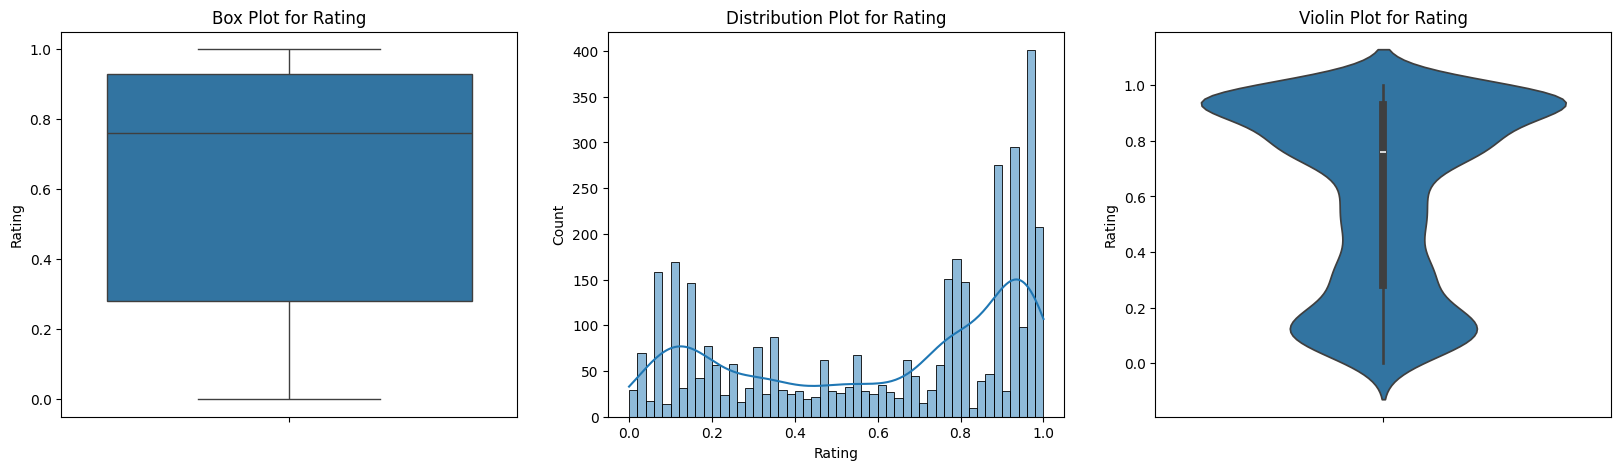

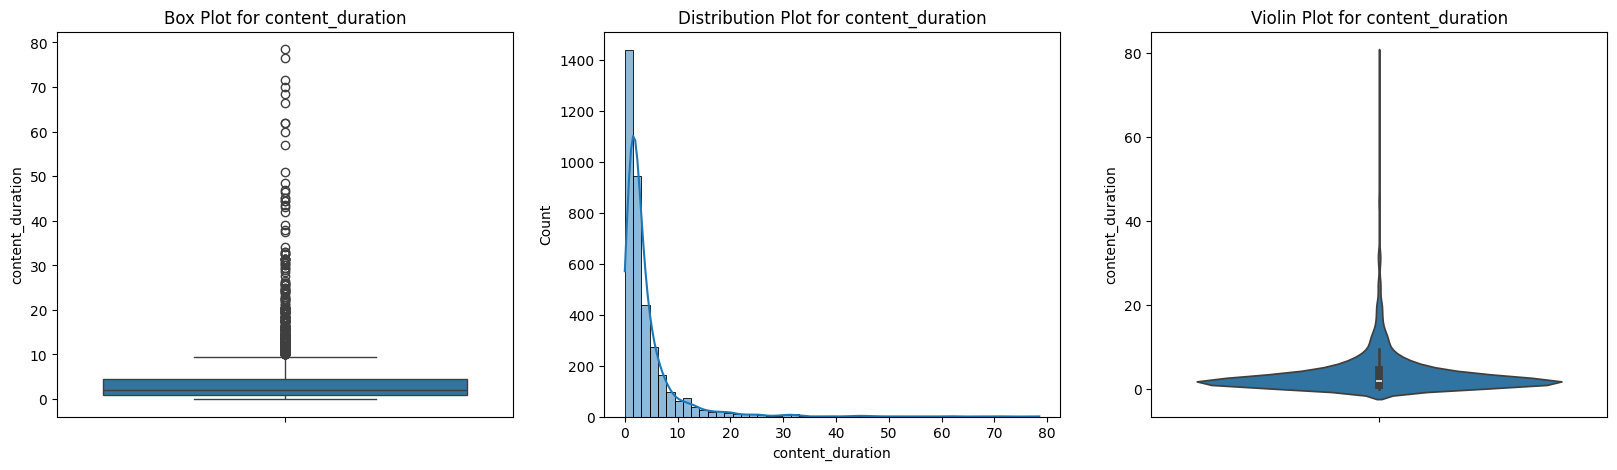

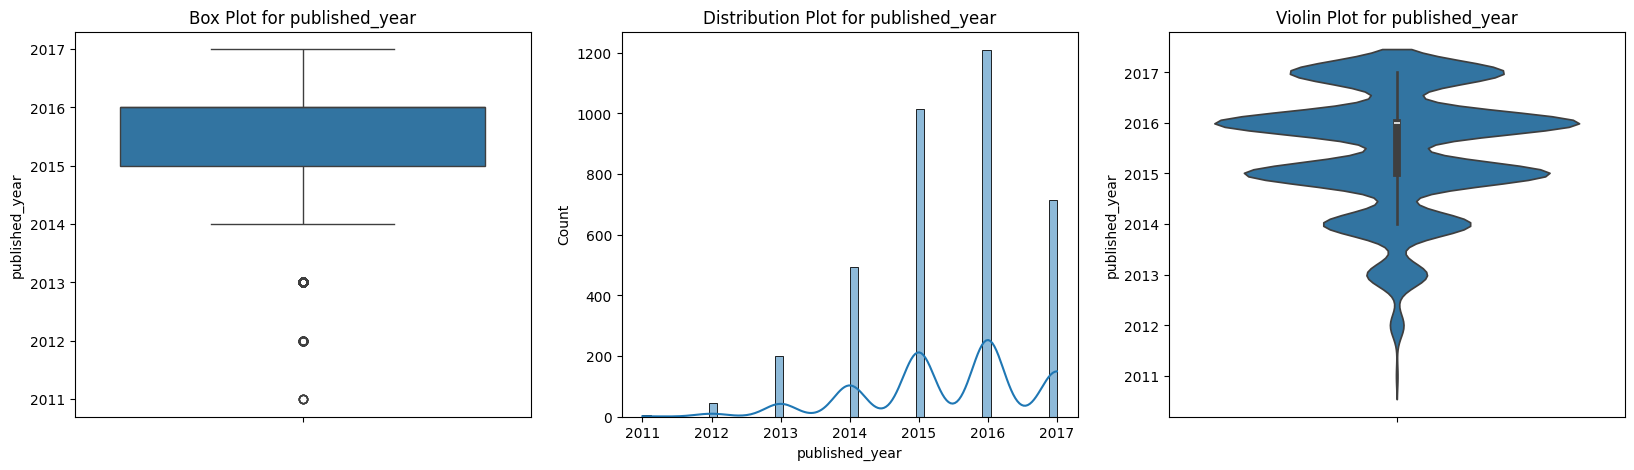

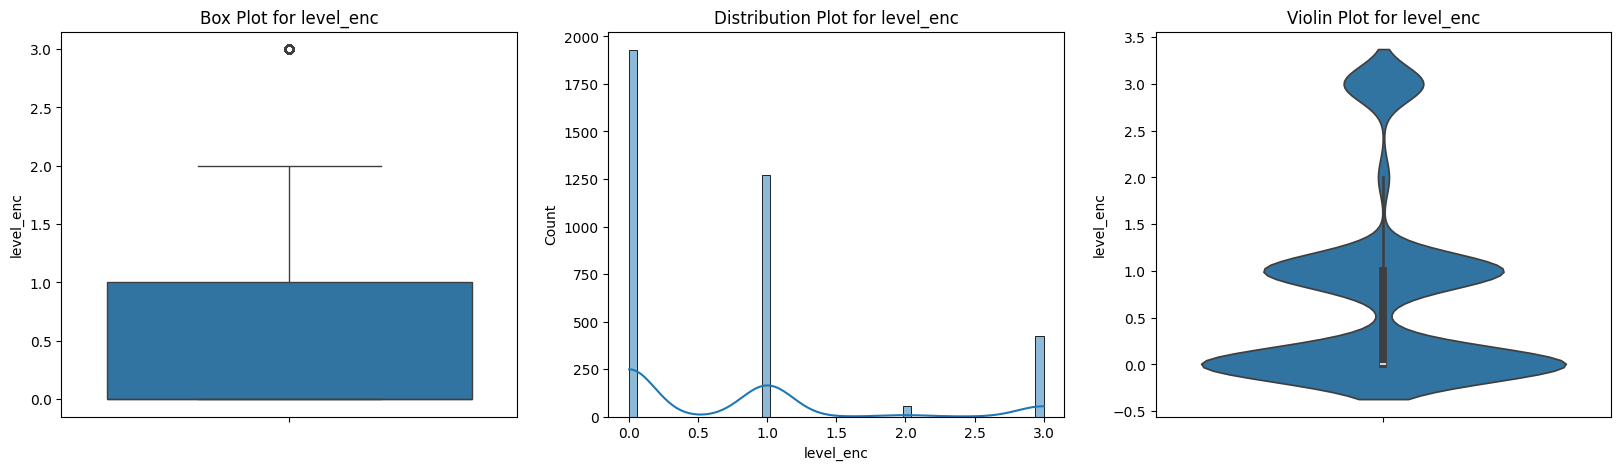

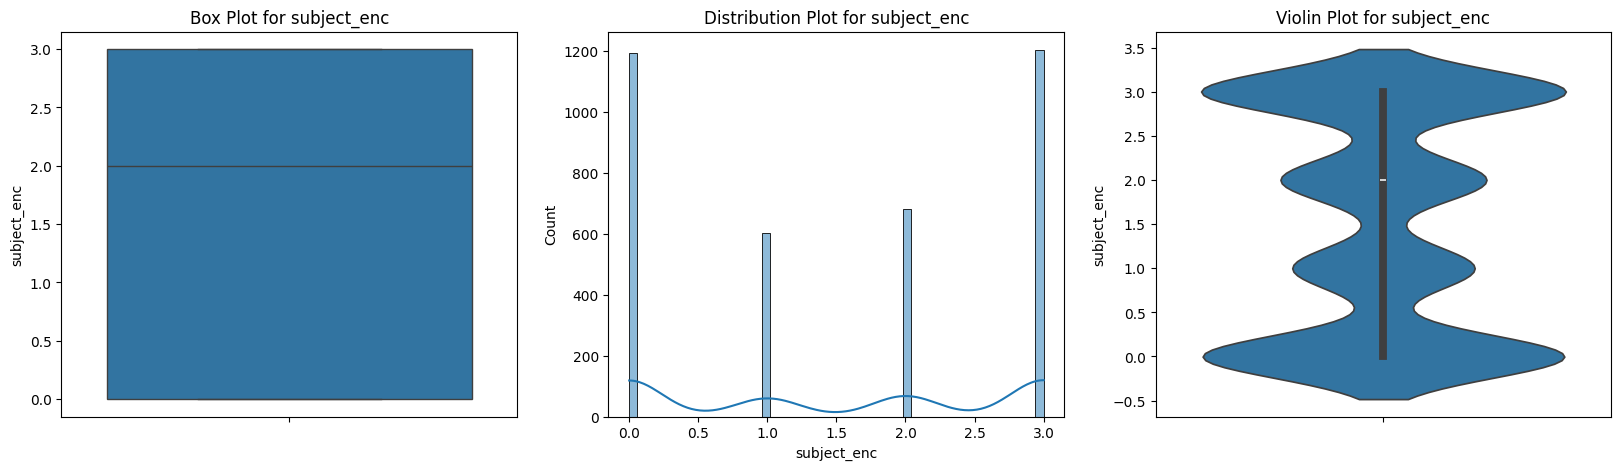

In [30]:
columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration', 'published_year', 'level_enc', 'subject_enc']
plot(df1, columns)

In [31]:
df1['subscribers_log'] = np.log(df1['num_subscribers'])
df1['reviews_log'] = np.log(df1['num_reviews'])
df1['lectures_log'] = np.log(df1['num_lectures'])
df1['duration_log'] = np.log(df1['content_duration'])

Log Transformation is used to remove the outliers

In [32]:
df1

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,published_year,level_enc,subject_enc,subscribers_log,reviews_log,lectures_log,duration_log
0,0,268923,8629,45,Beginner Level,0.82,10.500000,Subject: Web Development,2013,1,3,12.502180,9.062884,3.806662,2.351375
1,0,161029,279,27,Expert Level,0.69,3.500000,Subject: Web Development,2013,2,3,11.989340,5.631212,3.295837,1.252763
2,200,121584,27445,342,Beginner Level,0.89,43.000000,Subject: Web Development,2015,1,3,11.708361,10.219939,5.834811,3.761200
3,0,120291,5924,30,All Levels,0.78,3.000000,Subject: Web Development,2014,0,3,11.697669,8.686767,3.401197,1.098612
4,200,114512,22412,304,Beginner Level,0.55,30.500000,Subject: Web Development,2016,1,3,11.648435,10.017352,5.717028,3.417727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,20,0,0,23,All Levels,0.31,1.500000,Musical Instruments,2017,0,2,-inf,-inf,3.135494,0.405465
3676,125,0,0,7,Beginner Level,0.06,0.633333,Musical Instruments,2017,1,2,-inf,-inf,1.945910,-0.456758
3677,20,0,0,6,All Levels,0.08,0.533333,Musical Instruments,2017,0,2,-inf,-inf,1.791759,-0.628609
3678,35,0,0,13,Beginner Level,0.78,0.516667,Musical Instruments,2017,1,2,-inf,-inf,2.564949,-0.660357


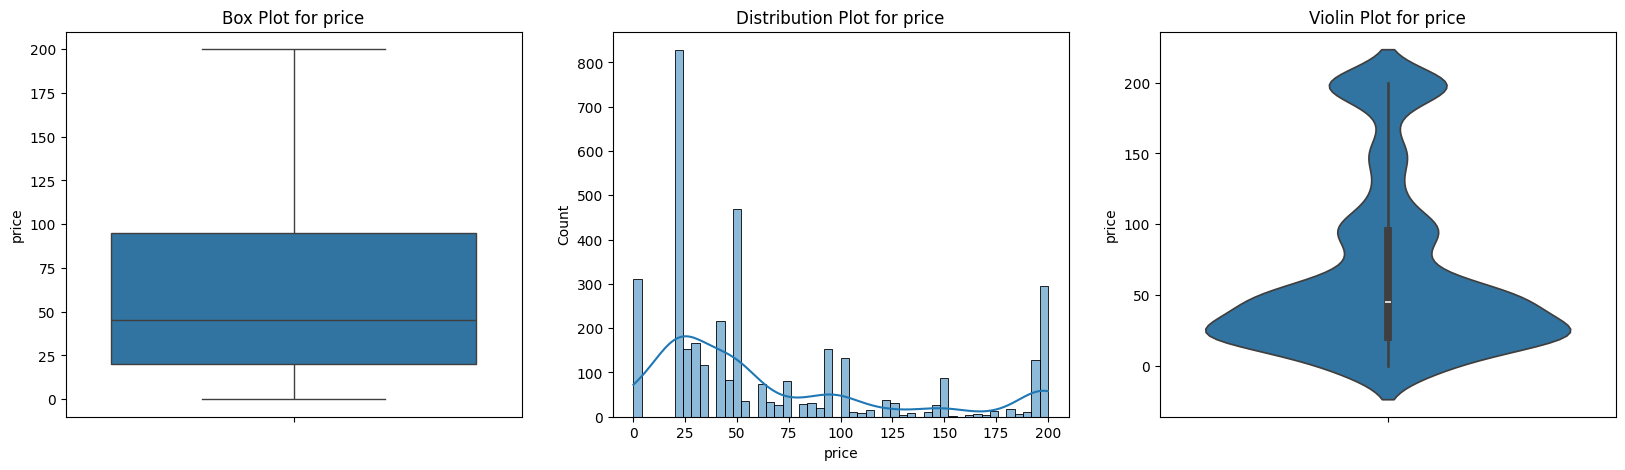

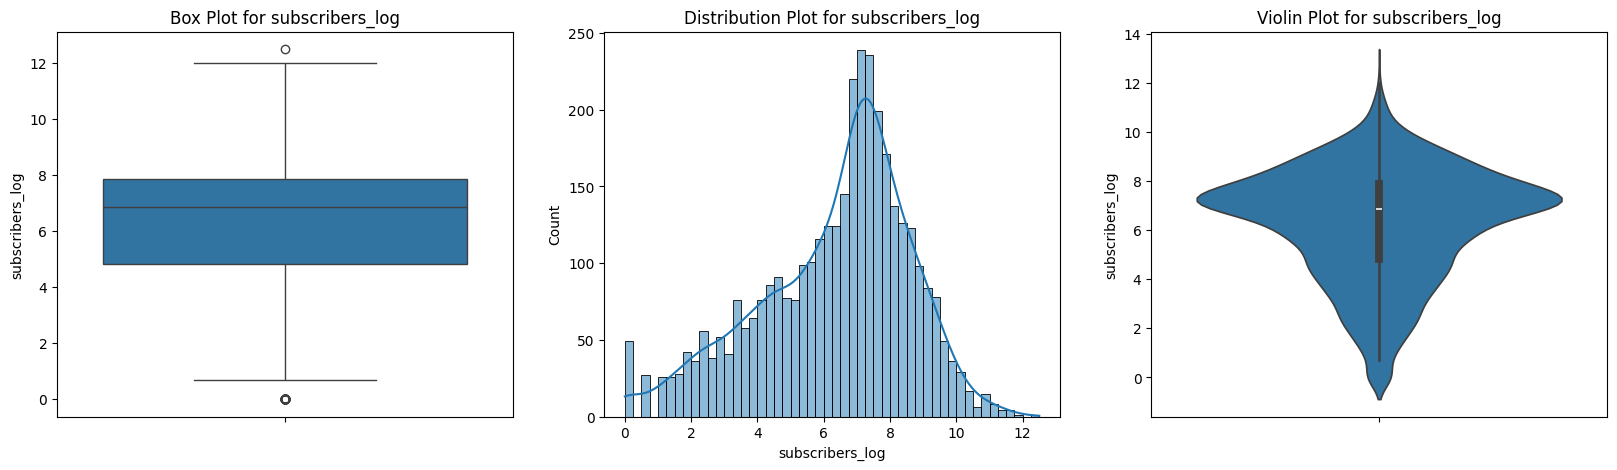

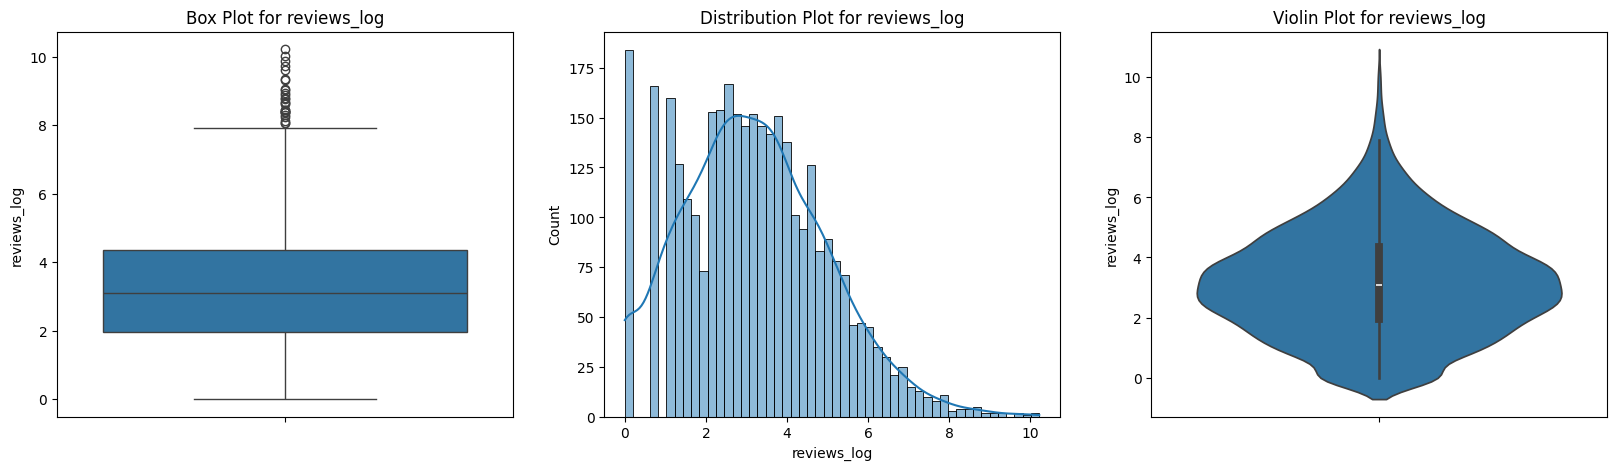

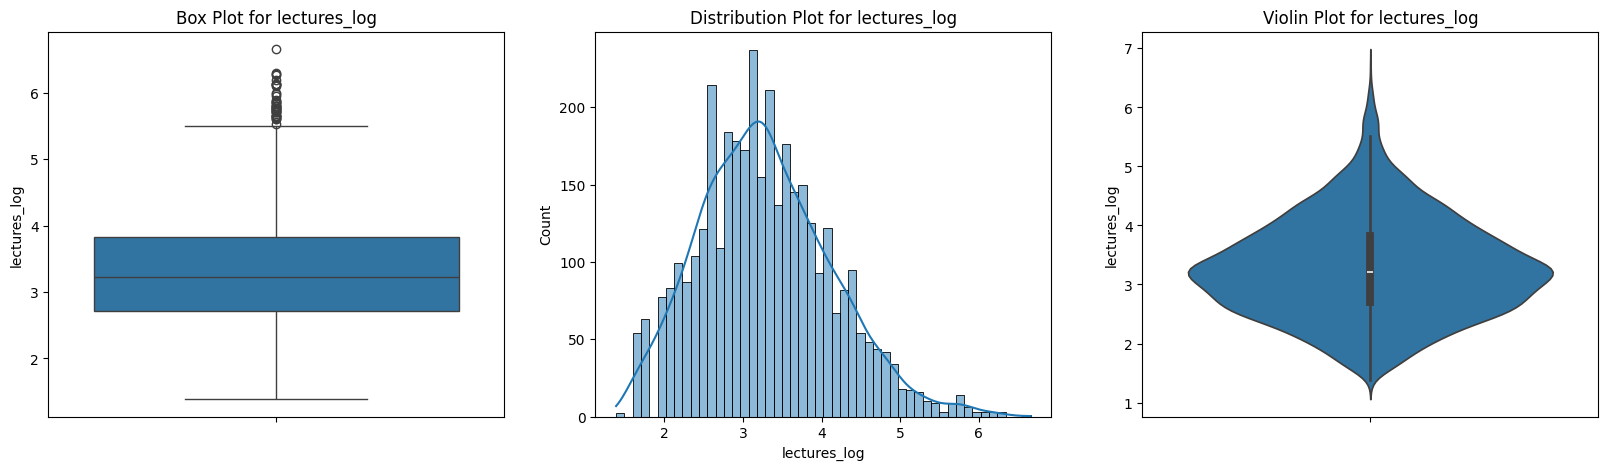

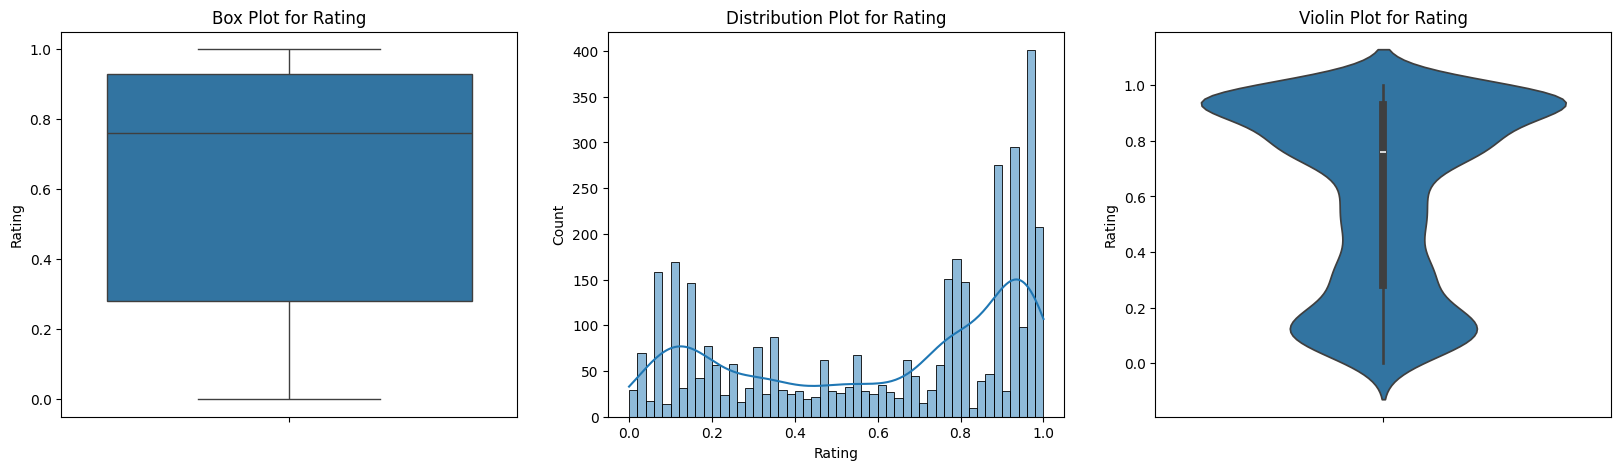

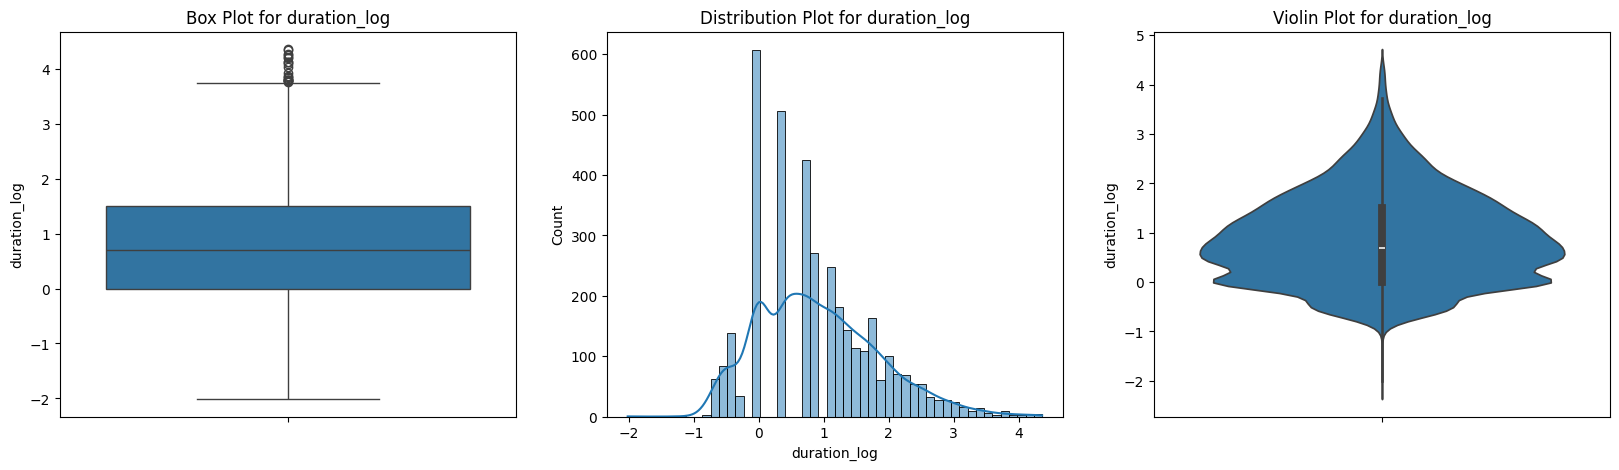

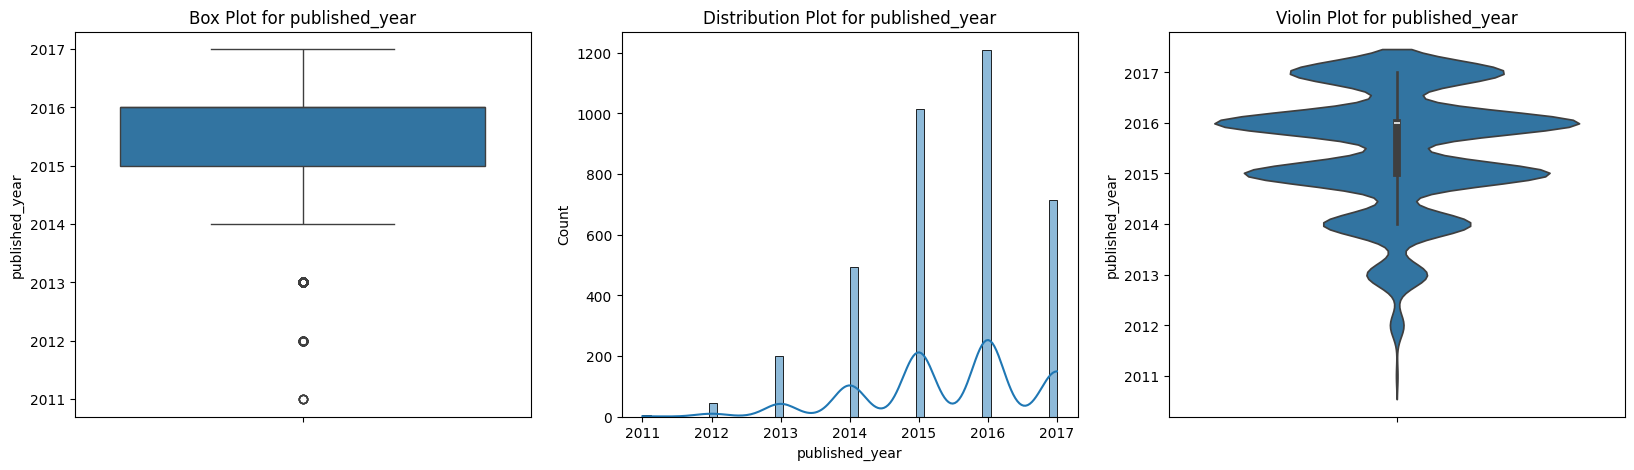

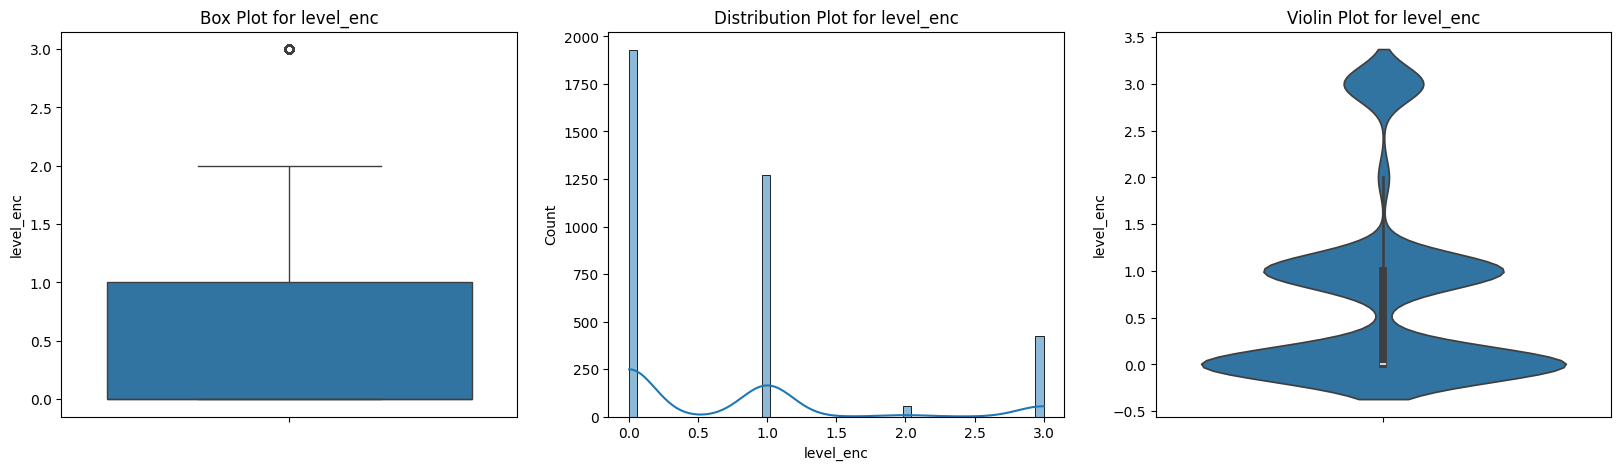

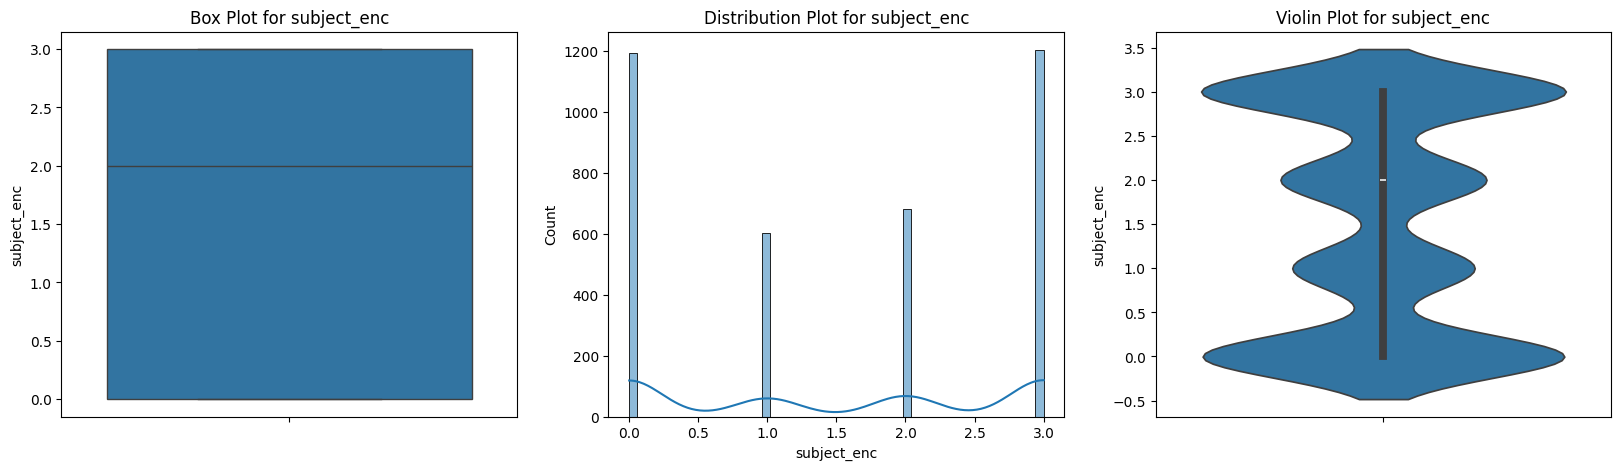

In [33]:
columns = ['price', 'subscribers_log', 'reviews_log', 'lectures_log', 'Rating', 'duration_log', 'published_year', 'level_enc', 'subject_enc']
plot(df1, columns)

In [34]:
df2 = df1.copy()
df2

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,published_year,level_enc,subject_enc,subscribers_log,reviews_log,lectures_log,duration_log
0,0,268923,8629,45,Beginner Level,0.82,10.500000,Subject: Web Development,2013,1,3,12.502180,9.062884,3.806662,2.351375
1,0,161029,279,27,Expert Level,0.69,3.500000,Subject: Web Development,2013,2,3,11.989340,5.631212,3.295837,1.252763
2,200,121584,27445,342,Beginner Level,0.89,43.000000,Subject: Web Development,2015,1,3,11.708361,10.219939,5.834811,3.761200
3,0,120291,5924,30,All Levels,0.78,3.000000,Subject: Web Development,2014,0,3,11.697669,8.686767,3.401197,1.098612
4,200,114512,22412,304,Beginner Level,0.55,30.500000,Subject: Web Development,2016,1,3,11.648435,10.017352,5.717028,3.417727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,20,0,0,23,All Levels,0.31,1.500000,Musical Instruments,2017,0,2,-inf,-inf,3.135494,0.405465
3676,125,0,0,7,Beginner Level,0.06,0.633333,Musical Instruments,2017,1,2,-inf,-inf,1.945910,-0.456758
3677,20,0,0,6,All Levels,0.08,0.533333,Musical Instruments,2017,0,2,-inf,-inf,1.791759,-0.628609
3678,35,0,0,13,Beginner Level,0.78,0.516667,Musical Instruments,2017,1,2,-inf,-inf,2.564949,-0.660357


Using IQR methhod to reduce the outliers

In [36]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


outlier(df2, 'subscribers_log')
outlier(df2, 'reviews_log')
outlier(df2, 'lectures_log')
outlier(df2, 'duration_log')
outlier(df2, 'published_year')
df2

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,published_year,level_enc,subject_enc,subscribers_log,reviews_log,lectures_log,duration_log
0,0,268923,8629,45,Beginner Level,0.82,10.500000,Subject: Web Development,2013.5,1,3,12.502180,8.432290,3.806662,2.351375
1,0,161029,279,27,Expert Level,0.69,3.500000,Subject: Web Development,2013.5,2,3,11.989340,5.631212,3.295837,1.252763
2,200,121584,27445,342,Beginner Level,0.89,43.000000,Subject: Web Development,2015.0,1,3,11.708361,8.432290,5.509528,3.760193
3,0,120291,5924,30,All Levels,0.78,3.000000,Subject: Web Development,2014.0,0,3,11.697669,8.432290,3.401197,1.098612
4,200,114512,22412,304,Beginner Level,0.55,30.500000,Subject: Web Development,2016.0,1,3,11.648435,8.432290,5.509528,3.417727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,20,0,0,23,All Levels,0.31,1.500000,Musical Instruments,2017.0,0,2,0.027096,-2.841303,3.135494,0.405465
3676,125,0,0,7,Beginner Level,0.06,0.633333,Musical Instruments,2017.0,1,2,0.027096,-2.841303,1.945910,-0.456758
3677,20,0,0,6,All Levels,0.08,0.533333,Musical Instruments,2017.0,0,2,0.027096,-2.841303,1.791759,-0.628609
3678,35,0,0,13,Beginner Level,0.78,0.516667,Musical Instruments,2017.0,1,2,0.027096,-2.841303,2.564949,-0.660357


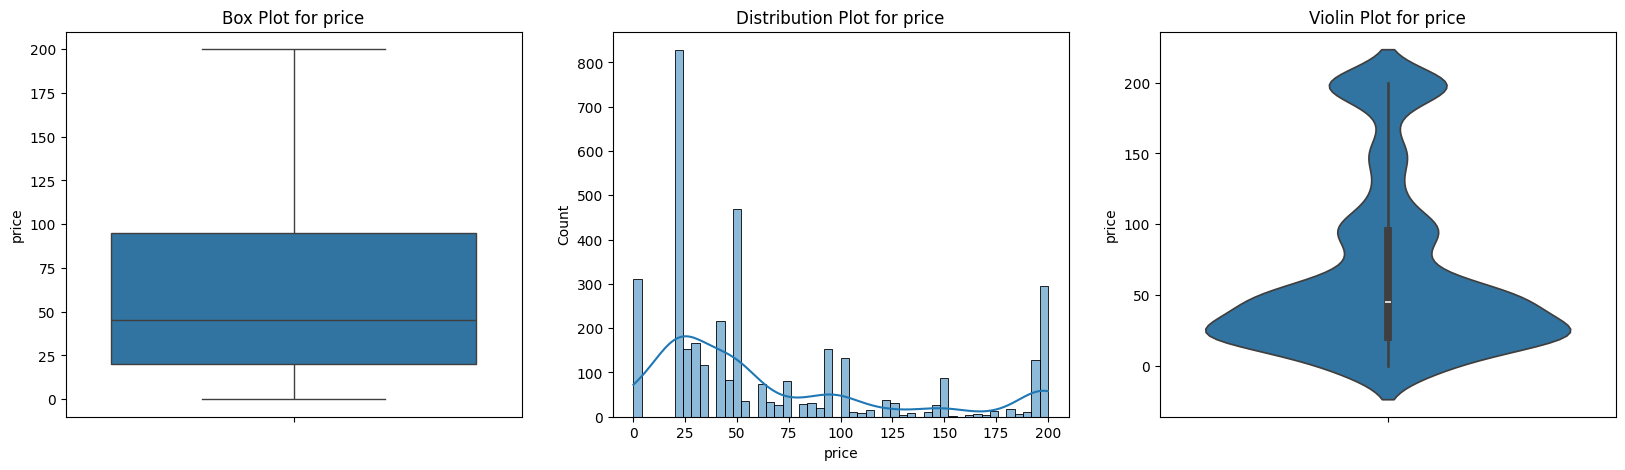

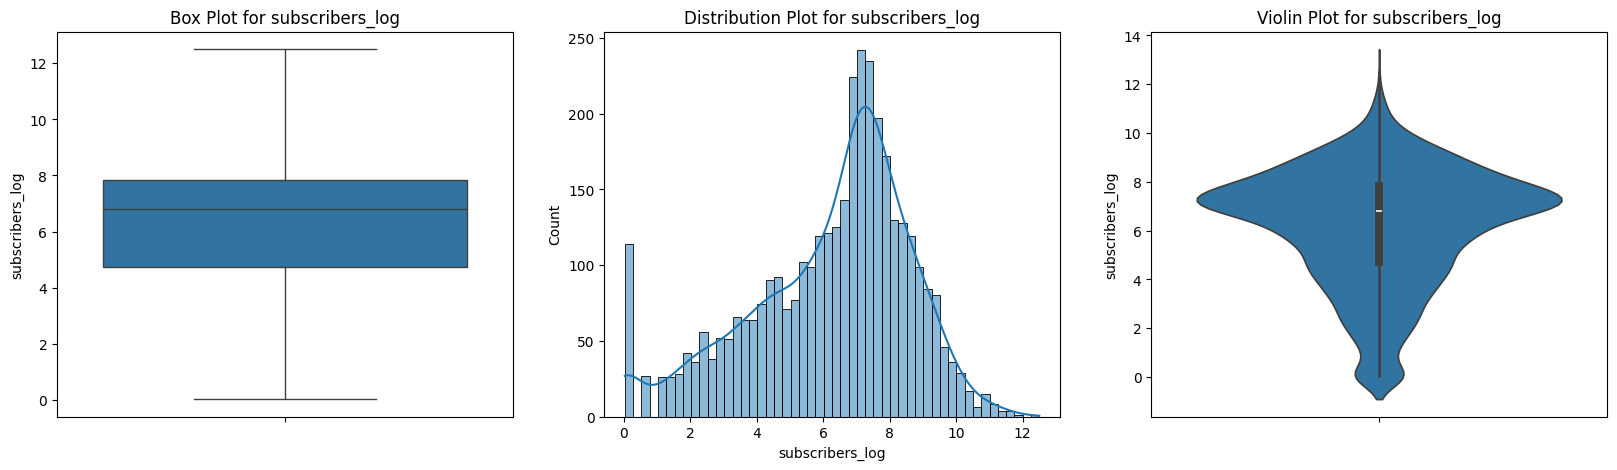

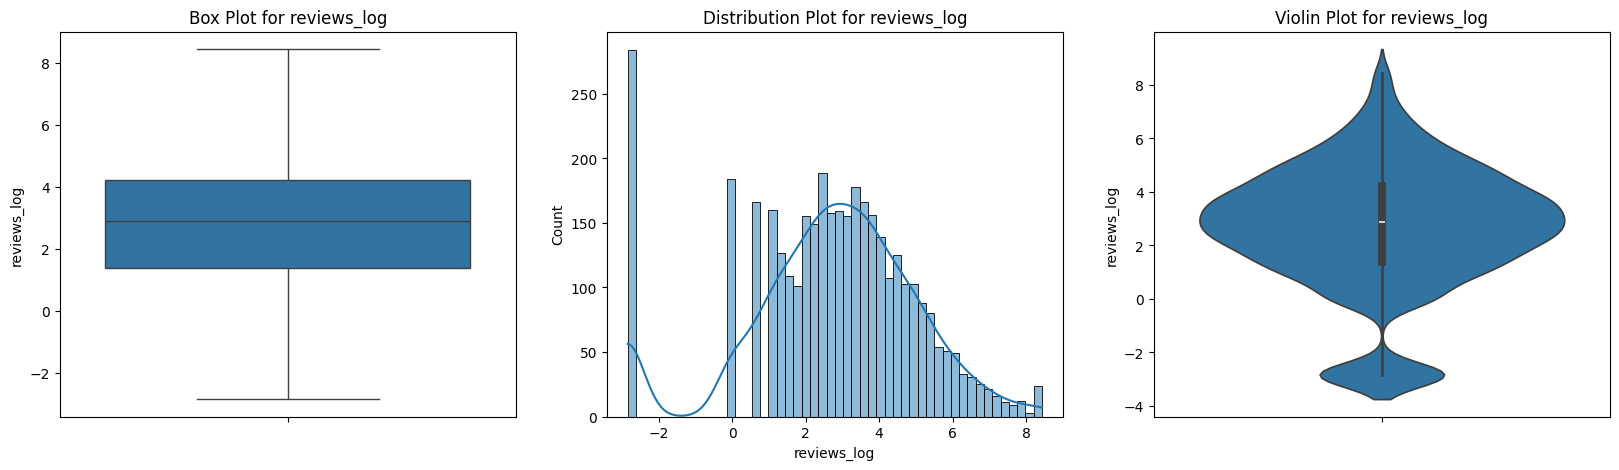

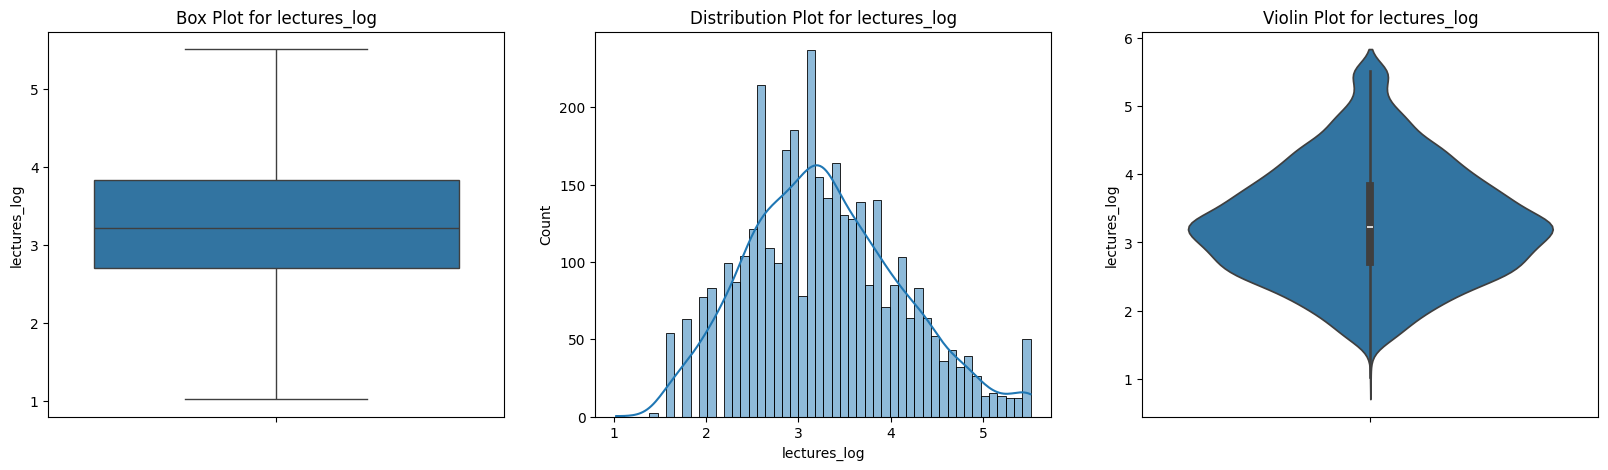

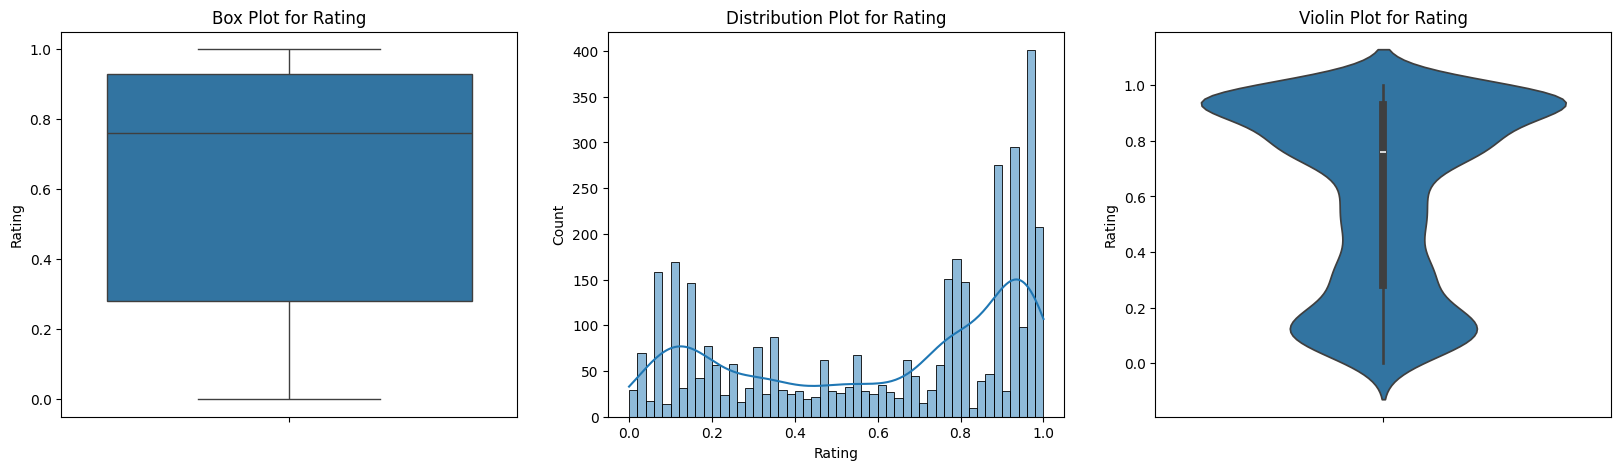

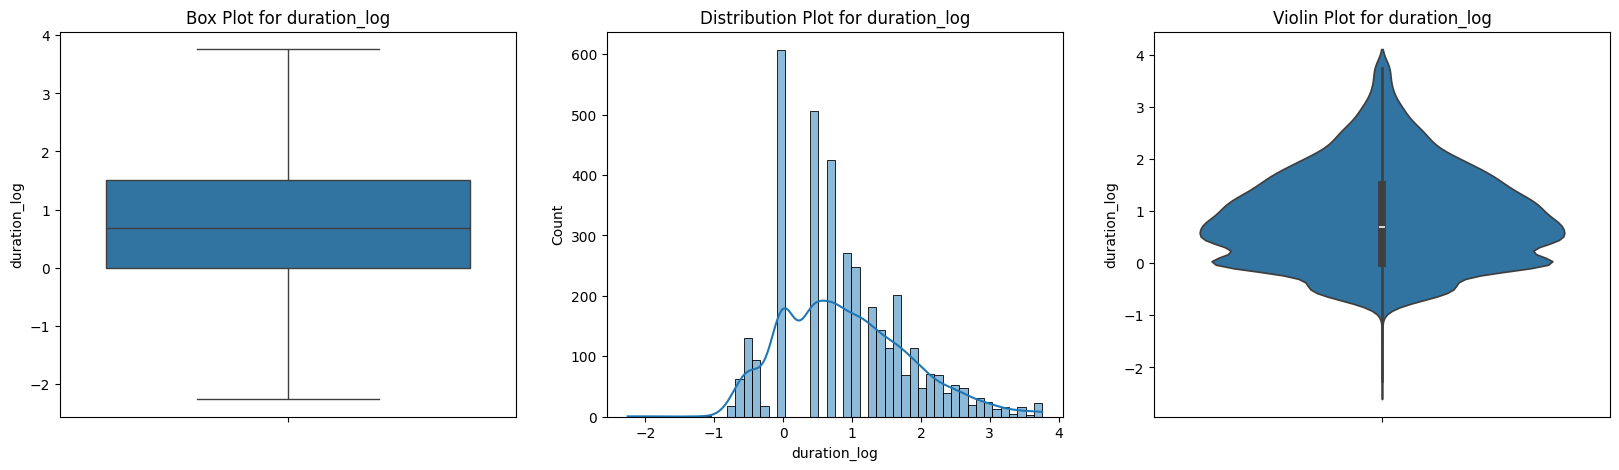

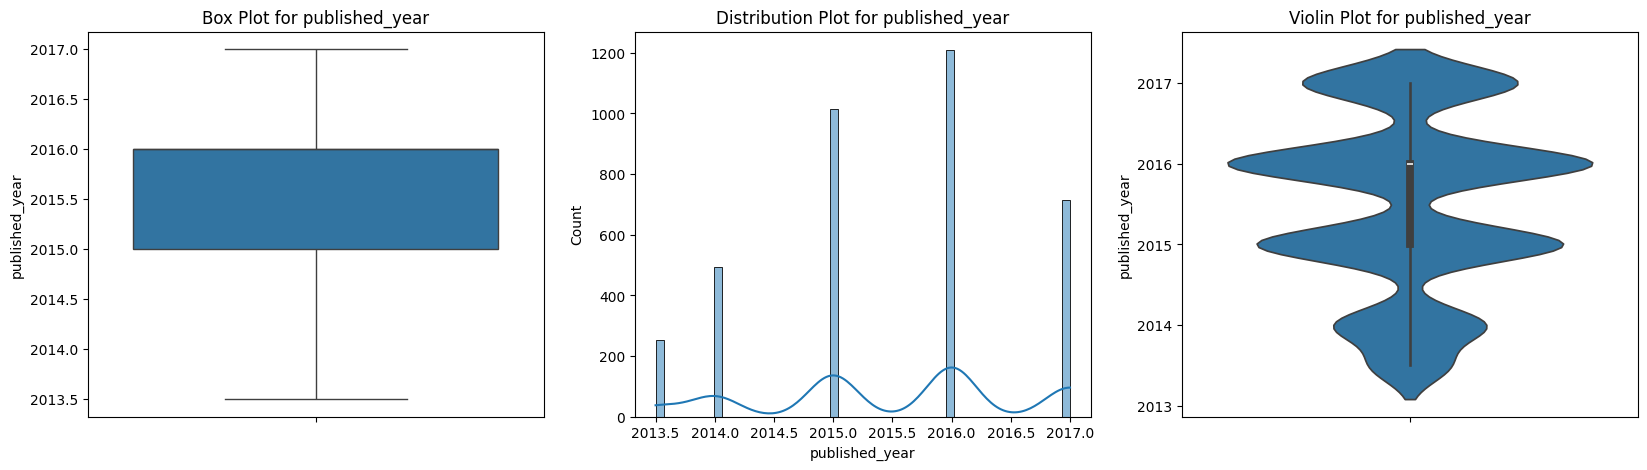

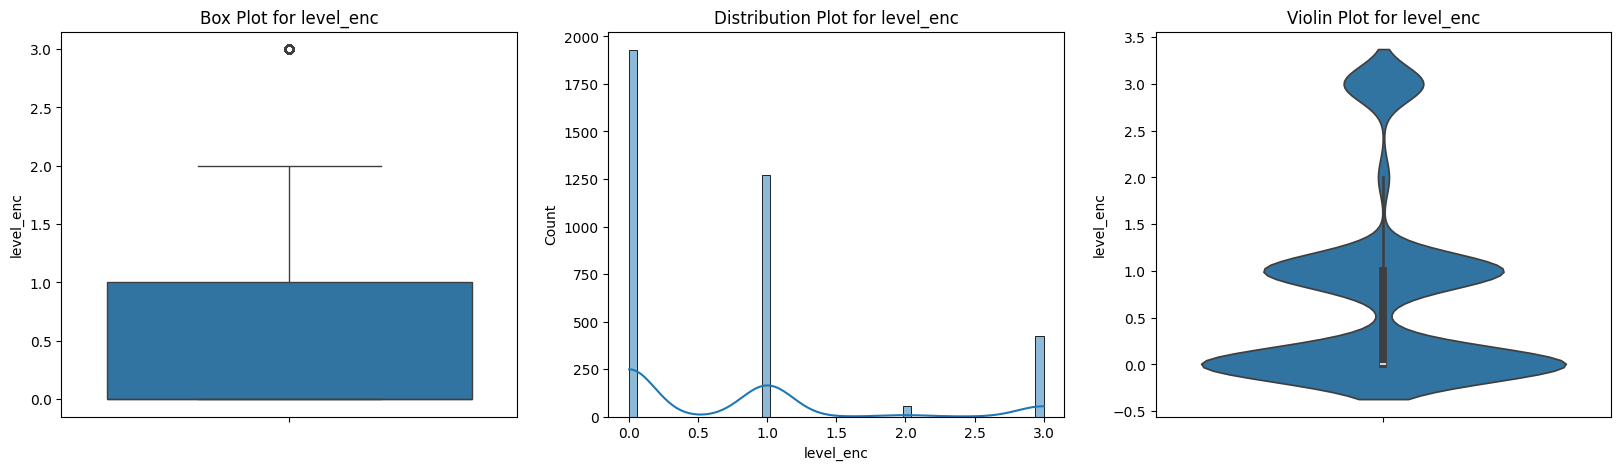

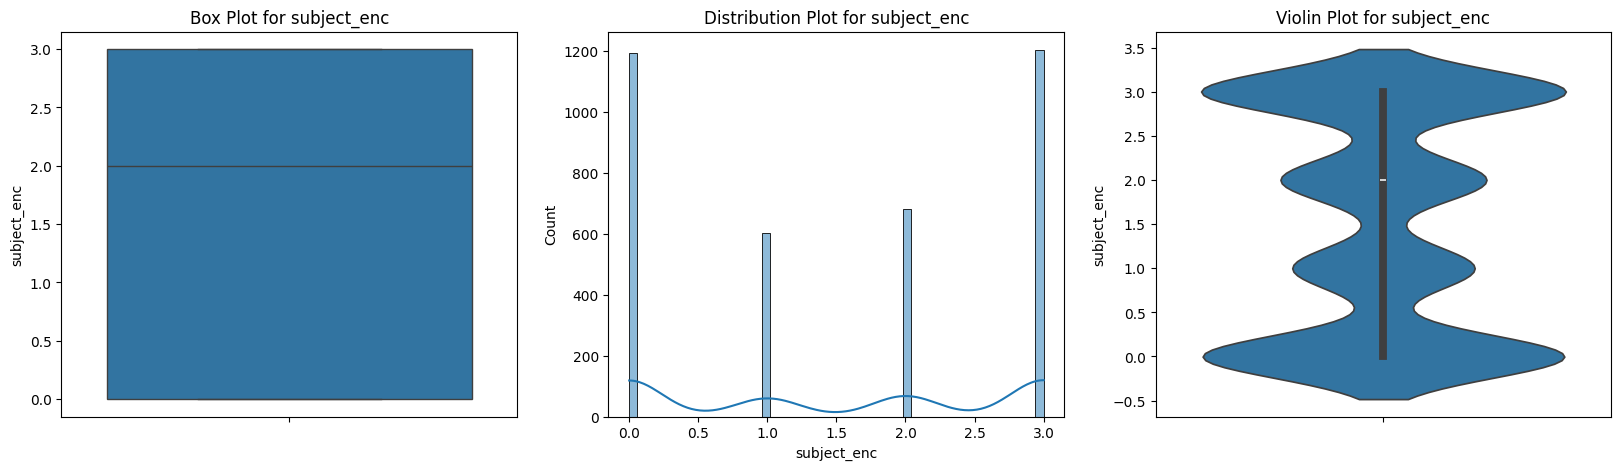

In [37]:
plot(df2, columns)


In [38]:
df3 = df2[columns]
df3

,price,subscribers_log,reviews_log,lectures_log,Rating,duration_log,published_year,level_enc,subject_enc
0,0,12.502180,8.432290,3.806662,0.82,2.351375,2013.5,1,3
1,0,11.989340,5.631212,3.295837,0.69,1.252763,2013.5,2,3
2,200,11.708361,8.432290,5.509528,0.89,3.760193,2015.0,1,3
3,0,11.697669,8.432290,3.401197,0.78,1.098612,2014.0,0,3
4,200,11.648435,8.432290,5.509528,0.55,3.417727,2016.0,1,3
...,...,...,...,...,...,...,...,...,...
3675,20,0.027096,-2.841303,3.135494,0.31,0.405465,2017.0,0,2
3676,125,0.027096,-2.841303,1.945910,0.06,-0.456758,2017.0,1,2
3677,20,0.027096,-2.841303,1.791759,0.08,-0.628609,2017.0,0,2
3678,35,0.027096,-2.841303,2.564949,0.78,-0.660357,2017.0,1,2


Seleting independent and target features for the model creation

In [39]:
x = df3.drop(columns = ['Rating'], axis = 1)
y = df3['Rating']
scaler = StandardScaler()
x = scaler.fit_transform(x)

Checking for Correlation Matrix

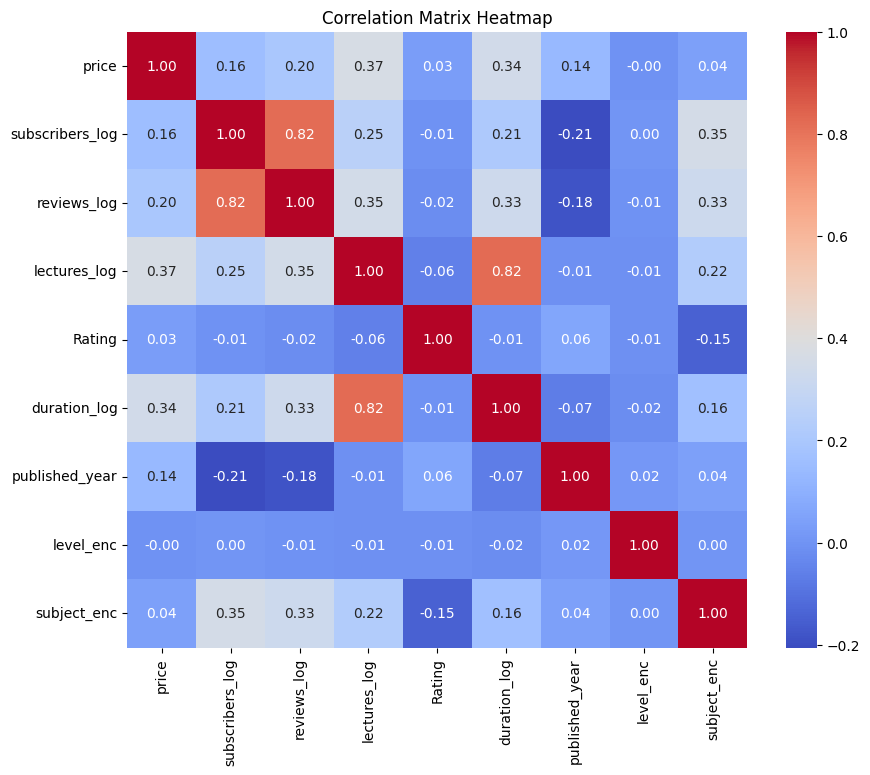

In [40]:
corr = df3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Checking which Regressor giving best accuracy for the predicction by using multiple regression models

In [41]:
def regression(x, y, algorithm):
     
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)


    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [42]:
print(regression(x, y, DecisionTreeRegressor))
print(regression(x, y, ExtraTreesRegressor))
print(regression(x, y, RandomForestRegressor))
print(regression(x, y, AdaBoostRegressor))
print(regression(x, y, GradientBoostingRegressor))
print(regression(x, y, XGBRegressor))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.9979167349764378, 'R2_test': -0.06177268373533562}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.9979167349764378, 'R2_test': 0.2105398543305873}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.9136845318050706, 'R2_test': 0.3041616740773322}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.21154956631786914, 'R2_test': 0.17239635228658945}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.4245820137913475, 'R2_test': 0.2974793877868498}
{'algorithm': 'XGBRegressor', 'R2_train': 0.9249660512544463, 'R2_test': 0.22908929923029286}


I Selected Random Forest Regressor, Which gives Highest R2 Score on Training and Testing datasets


Yes, you can use a regression model with a low R-squared value, but it's important to understand the limitations and potential issues associated with it. A low R-squared value indicates that the model is not explaining much of the variability in the dependent variable, which can lead to less accurate predictions and less reliable estimates of the relationships between the variables.

Since we are finding the ratings it can be affected by each and individual as per the persons desire.

Even though we are using the Random Forest Reegrssor since it gives the highest r2 score for testing data among the other regressors I tested.


Now Iam Using the parameter grid search for getting the best parameter for the random forest regressor

In [43]:
model = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
 
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5}


{'R2': 0.26156145958163646,
 'Mean Absolute Error': 0.2328071320946134,
 'Mean Squared Error': 0.07916580820307362,
 'Root Mean Squared Error': 0.2813641914015954}

In [44]:
y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print("R2 Train Value: ", r2_train)
print("R2 Test :", r2_test)

R2 Train Value:  0.7688370472098908
R2 Test : 0.26156145958163646


Tweeking the bestparameter a little to increase the r2 score with multiple numbers of testing, Over tweeking will result in overfitting or under fitting the data. So tweek little by little to know the best values

In [45]:
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print("R2 Train Value: ", r2_train)
print("R2 Test Value:", r2_test)

R2 Train Value:  0.8585717139984179
R2 Test Value: 0.30043727594731195


In [46]:
model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print("R2 Train Value: ", r2_train)
print("R2 Test Value:", r2_test)

R2 Train Value:  0.8559684561285241
R2 Test Value: 0.3138527210647978


At last saving the model in the pickle  file as well as the scaler

In [47]:
with open('Rating_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Loading the model and scaler to test

In [48]:
with open('Rating_regression_model.pkl', 'rb') as f:
    reg = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    sca = pickle.load(f)

Testing the models output using the random data and the model to predict the Rating

In [50]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3680.0,66.115217,61.022873,0.0,20.000000,45.000000,95.000000,200.000000
num_subscribers,3680.0,3196.774728,9481.724036,0.0,112.000000,912.000000,2555.750000,268923.000000
num_reviews,3680.0,156.159511,935.176831,0.0,4.000000,18.000000,67.000000,27445.000000
num_lectures,3680.0,40.113315,50.373570,0.0,15.000000,25.000000,46.000000,779.000000
Rating,3680.0,0.610868,0.334105,0.0,0.280000,0.760000,0.930000,1.000000
content_duration,3680.0,4.093859,6.052050,0.0,1.000000,2.000000,4.500000,78.500000
published_year,3680.0,2015.431522,1.184380,2011.0,2015.000000,2016.000000,2016.000000,2017.000000
level_enc,3680.0,0.720924,0.959692,0.0,0.000000,0.000000,1.000000,3.000000
subject_enc,3680.0,1.514674,1.246382,0.0,0.000000,2.000000,3.000000,3.000000
subscribers_log,3680.0,-inf,NaN,-inf,4.718499,6.815640,7.846101,12.502180


In [55]:
test = np.array([[50, np.log(25000), np.log(300), np.log(20), np.log(2), 2013, 1, 2]])

test = sca.transform(test)

predicted = reg.predict(test)

print(predicted)

[0.40466556]
